<a href="https://colab.research.google.com/github/LuellaS/testRepo/blob/main/%C4%86wiczenia_08_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **A regression example**

Common type of machine learning problem is "regression", which consists of predicting a continuous value instead of a discrete label. For instance, predicting the temperature tomorrow, given meteorological data, or predicting the time that a software project will take to complete, given its specifications.



In [ ]:

from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt



In [ ]:
# install optuna
! pip install optuna

In [ ]:
import optuna


**1-dimensional data**

In [ ]:
def funct(x):
  return x*x*np.sin(x)+np.log(2*x)

size = 200
low=0
high=12
error=20

XX_train = np.random.uniform(low=low, high=high, size=size)
XX_test = np.random.uniform(low=low, high=high, size=size)
yy_train = funct(XX_train) + np.random.normal(0., error, size)
yy_test = funct(XX_test) + np.random.normal(0., error, size)

print(XX_train.shape, yy_train.shape)

(200,) (200,)


Plot the function and data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log



<function matplotlib.pyplot.show>

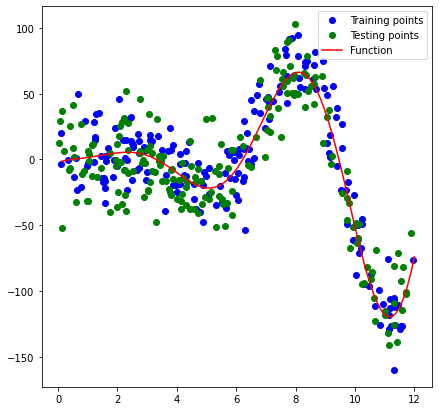

In [ ]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train,yy_train, 'o', color='blue', label='Training points')
plt.plot(XX_test,yy_test, 'o', color='green', label='Testing points')

points = np.linspace(low, high,num=100)
plt.plot(points, funct(points),  color='red', label='Function')
plt.legend()


plt.show


**Preparing the data**

It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation. This is easily done in Numpy:


In [ ]:
# Tutaj należy znormalizować dane, i.e. 
# - odjąć średnią
# - podzielić przez odchylenie standardowe

# 
mean = XX_train.mean(axis=0)
XX_train_n = XX_train-mean
std = XX_train_n.std(axis=0)
XX_train_n /= std

# to samo dla x_test
XX_test_n = XX_test - mean
XX_test_n /= std

mean1 = yy_train.mean(axis=0)
yy_train_n = yy_train-mean1
std1 = yy_train_n.std(axis=0)
yy_train_n /= std1

# to samo dla y_test
yy_test_n = yy_test - mean1
yy_test_n /= std1

# A teraz to samo dla yy_train i yy_test
# dopisać to samo dla y

Define neural network

In [ ]:
# Zbudować sieć neuronową, działa: dwie warstwy ukryte, aktywacja relu
from keras import models
from keras import layers



In [ ]:

def objective(trial):
    units = trial.suggest_discrete_uniform('units', 8, 2048, 1)
    dropout = trial.suggest_uniform('dropout', 0, 0.5)
    model0 = Sequential(name='network')
    #.....
    model0.add(layers.Dense(units, activation='relu', input_shape=(1,)))
    model0.add(Dropout(dropout))
    model0.add(layers.Dense(units, activation='relu'))
    model0.add(Dropout(dropout))
    model0.add(layers.Dense(1, activation='linear'))
    # early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50 )
    
    #model0.summary()
    opt=optimizers.RMSprop(lr=0.001)
    model0.compile(optimizer=opt,
                       loss='mean_squared_error',
                       metrics=['mse'])
    history = model0.fit(XX_train_n, yy_train_n,
                                     epochs=500,
                                     batch_size=128,
                                     validation_data=(XX_test_n, yy_test_n),
                                     verbose = 0, callbacks=[es])
    results = model0.evaluate(XX_test_n, yy_test_n)
    return results[0]

In [ ]:
study = optuna.create_study()
study = optuna.create_study(direction='minimize', pruner=optuna.pruners.MedianPruner(), sampler=optuna.samplers.TPESampler() )

study.optimize(objective, n_trials=20)

study.best_params 


[I 2020-12-08 08:29:23,317] A new study created in memory with name: no-name-2c707197-eb23-4975-be53-3b035db2c1f1
[I 2020-12-08 08:29:23,321] A new study created in memory with name: no-name-2902a532-fcac-4ff9-8f1a-222aa04c0d25


Epoch 00200: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.1902 - mse: 0.1902


[I 2020-12-08 08:29:27,759] Trial 0 finished with value: 0.19015420973300934 and parameters: {'units': 1245.0, 'dropout': 0.2938019784061737}. Best is trial 0 with value: 0.19015420973300934.


Epoch 00375: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.1914 - mse: 0.1914


[I 2020-12-08 08:29:35,253] Trial 1 finished with value: 0.19137901067733765 and parameters: {'units': 46.0, 'dropout': 0.054423483281965834}. Best is trial 0 with value: 0.19015420973300934.


Epoch 00221: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2051 - mse: 0.2051


[I 2020-12-08 08:29:39,925] Trial 2 finished with value: 0.20514556765556335 and parameters: {'units': 208.0, 'dropout': 0.22114144638461702}. Best is trial 0 with value: 0.19015420973300934.


Epoch 00085: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2050 - mse: 0.2050


[I 2020-12-08 08:29:42,052] Trial 3 finished with value: 0.20500795543193817 and parameters: {'units': 701.0, 'dropout': 0.061999116187437864}. Best is trial 0 with value: 0.19015420973300934.


Epoch 00098: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2111 - mse: 0.2111


[I 2020-12-08 08:29:44,534] Trial 4 finished with value: 0.21106009185314178 and parameters: {'units': 1110.0, 'dropout': 0.005878926428265152}. Best is trial 0 with value: 0.19015420973300934.


7/7 [==============================] - 0s 2ms/step - loss: 0.2400 - mse: 0.2400


[I 2020-12-08 08:29:54,202] Trial 5 finished with value: 0.24003362655639648 and parameters: {'units': 11.0, 'dropout': 0.20935757386847437}. Best is trial 0 with value: 0.19015420973300934.


Epoch 00247: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2036 - mse: 0.2036


[I 2020-12-08 08:29:59,773] Trial 6 finished with value: 0.2036261409521103 and parameters: {'units': 276.0, 'dropout': 0.23327740178080458}. Best is trial 0 with value: 0.19015420973300934.


Epoch 00094: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2131 - mse: 0.2131


[I 2020-12-08 08:30:02,215] Trial 7 finished with value: 0.21312803030014038 and parameters: {'units': 473.0, 'dropout': 0.10006665270414988}. Best is trial 0 with value: 0.19015420973300934.


Epoch 00216: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2181 - mse: 0.2181


[I 2020-12-08 08:30:06,762] Trial 8 finished with value: 0.2181263417005539 and parameters: {'units': 410.0, 'dropout': 0.2188396235487659}. Best is trial 0 with value: 0.19015420973300934.


Epoch 00125: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2218 - mse: 0.2218


[I 2020-12-08 08:30:09,986] Trial 9 finished with value: 0.22176975011825562 and parameters: {'units': 1626.0, 'dropout': 0.31501937793485907}. Best is trial 0 with value: 0.19015420973300934.


Epoch 00118: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2121 - mse: 0.2121


[I 2020-12-08 08:30:13,139] Trial 10 finished with value: 0.21213175356388092 and parameters: {'units': 1670.0, 'dropout': 0.49642349168470556}. Best is trial 0 with value: 0.19015420973300934.


Epoch 00196: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2072 - mse: 0.2072


[I 2020-12-08 08:30:17,680] Trial 11 finished with value: 0.20721931755542755 and parameters: {'units': 1287.0, 'dropout': 0.373355283398942}. Best is trial 0 with value: 0.19015420973300934.


Epoch 00176: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.1981 - mse: 0.1981


[I 2020-12-08 08:30:21,510] Trial 12 finished with value: 0.19812995195388794 and parameters: {'units': 858.0, 'dropout': 0.40746359993043246}. Best is trial 0 with value: 0.19015420973300934.


Epoch 00232: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2137 - mse: 0.2137


[I 2020-12-08 08:30:26,638] Trial 13 finished with value: 0.21373271942138672 and parameters: {'units': 1342.0, 'dropout': 0.11019320393744592}. Best is trial 0 with value: 0.19015420973300934.


Epoch 00156: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2352 - mse: 0.2352


[I 2020-12-08 08:30:30,744] Trial 14 finished with value: 0.23517389595508575 and parameters: {'units': 2010.0, 'dropout': 0.314917429559537}. Best is trial 0 with value: 0.19015420973300934.


Epoch 00242: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2576 - mse: 0.2576


[I 2020-12-08 08:30:36,428] Trial 15 finished with value: 0.2576279640197754 and parameters: {'units': 1512.0, 'dropout': 0.17080871686335208}. Best is trial 0 with value: 0.19015420973300934.


Epoch 00151: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2255 - mse: 0.2255


[I 2020-12-08 08:30:40,544] Trial 16 finished with value: 0.22547084093093872 and parameters: {'units': 1866.0, 'dropout': 0.31701493191883584}. Best is trial 0 with value: 0.19015420973300934.


Epoch 00174: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.1868 - mse: 0.1868


[I 2020-12-08 08:30:44,441] Trial 17 finished with value: 0.18681512773036957 and parameters: {'units': 1001.0, 'dropout': 0.47628342018309316}. Best is trial 17 with value: 0.18681512773036957.


Epoch 00103: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2029 - mse: 0.2029


[I 2020-12-08 08:30:46,914] Trial 18 finished with value: 0.20286715030670166 and parameters: {'units': 971.0, 'dropout': 0.4863462975916696}. Best is trial 17 with value: 0.18681512773036957.


Epoch 00187: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2204 - mse: 0.2204


[I 2020-12-08 08:30:51,096] Trial 19 finished with value: 0.2203630954027176 and parameters: {'units': 636.0, 'dropout': 0.44695628754200734}. Best is trial 17 with value: 0.18681512773036957.


{'dropout': 0.47628342018309316, 'units': 1001.0}

## Visualizing the Optimization History

In [ ]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

## Visualizing High-dimensional Parameter Relationships

In [ ]:
from optuna.visualization import plot_parallel_coordinate

plot_parallel_coordinate(study, params=['units', 'dropout'])

## Visualizing Parameter Relationships

In [ ]:
from optuna.visualization import plot_contour

plot_contour(study)

### Selecting Parameters to Visualize

In [ ]:
plot_contour(study, params=['units', 'dropout'])

## Visualizing Individual Parameters

In [ ]:
from optuna.visualization import plot_slice

plot_slice(study)

### Selecting Parameters to Visualize

In [ ]:
plot_slice(study, params=['units', 'dropout'])

## Visualizing Parameter Importances

In [ ]:
from optuna.visualization import plot_param_importances

plot_param_importances(study)

In [ ]:
trial = study.best_trial
units = int(trial.params.get('units'))
dropout = (trial.params.get('dropout'))
print(units)
print(dropout)

1001
0.47628342018309316


In [ ]:
model0 = Sequential(name='network')
    #.....
model0.add(layers.Dense(units, activation='relu', input_shape=(1,)))
model0.add(Dropout(dropout))
model0.add(layers.Dense(units, activation='relu'))
model0.add(Dropout(dropout))
model0.add(layers.Dense(1, activation='linear'))
# early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50 )
    
#model0.summary()
opt=optimizers.RMSprop(lr=0.001)
model0.compile(optimizer=opt,
                       loss='mean_squared_error',
                       metrics=['mse'])
history = model0.fit(XX_train_n, yy_train_n,
                                     epochs=500,
                                     batch_size=128,
                                     validation_data=(XX_test_n, yy_test_n),
                                     verbose = 0, callbacks=[es])
results = model0.evaluate(XX_test_n, yy_test_n)

Epoch 00125: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.1906 - mse: 0.1906


Plot loss

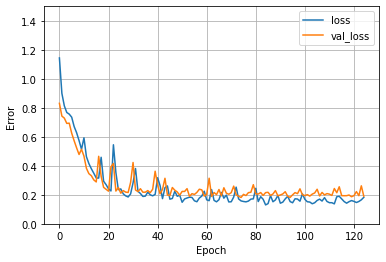

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error ')
  plt.legend()
  plt.grid(True)

plot_loss(history)


Evaluate neural network

In [ ]:
results = model0.evaluate(XX_test_n, yy_test_n)

print('loss test data: ', results[0])
print('mse test data: ', results[1])

results = model0.evaluate(XX_train_n, yy_train_n)

print('loss train data: ', results[0])
print('mse train data: ', results[1])

7/7 [==============================] - 0s 2ms/step - loss: 0.1906 - mse: 0.1906
loss test data:  0.19057923555374146
mse test data:  0.19057923555374146
7/7 [==============================] - 0s 1ms/step - loss: 0.1322 - mse: 0.1322
loss train data:  0.1321999430656433
mse train data:  0.1321999430656433


Plot results

<function matplotlib.pyplot.show>

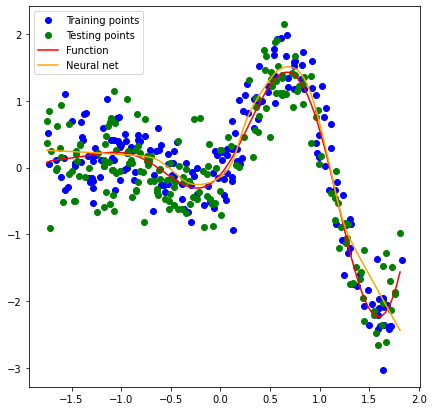

In [ ]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train_n,yy_train_n, 'o', color='blue', label='Training points')
plt.plot(XX_test_n,yy_test_n, 'o', color='green', label='Testing points')

points = np.linspace(min(XX_test_n), max(XX_test_n),num=100)
plt.plot(points, (funct(points*std+mean)-mean1)/std1,  color='red', label='Function')

plt.plot(points, model0.predict(points),  color='orange', label='Neural net')


plt.legend()


plt.show